# Poisson en 1D

A continuación se presentan ejemplos de implementaciones para calcular numéricamente la solución de la ecuación de Poisson en una dimensión espacial.

El problema a resolver es:
\begin{align}
  \frac{\partial^2 \phi}{\partial x^2} = -f
\end{align}

Sujeto a las condiciones:
\begin{align}
  \phi(x)_\Omega = x\cos(x)
\end{align}
y
\begin{align}
  f(x) = 2\sin(x) + x\cos(x)
\end{align}

## Importación de librerias

Primero se hace la importación de las librerías necesarias para trabajar con cuestiones de computación científica en Python.

In [1]:
import numpy as np                                                              # Librería con funciones y arreglos de cómputo numérico.
import matplotlib.pyplot as plt                                                 # Nos permitirá graficar los resultados.

## Condiciones

Se definen las funciones que actuarán como las condiciones del problema. Estas pueden cambiarse dependiendo del problema a modelar con la finalidad de cambiar el problema que se pretende resolver.

En este caso, las funciones que se usarán son:
\begin{align}
  \phi(x) = x\cos(x)
\end{align}
y
\begin{align}
  f(x) = 2\sin(x) + x\cos(x)
\end{align}

In [2]:
def phi(x):                                                                     # Se define la función phi.
    phi = x*np.cos(x)                                                           # Se agrega la expresión para la condición.
    return phi                                                                  # Regresa el valor de la condición.

def f(x):                                                                       # Se define la función phi.
    f = 2*np.sin(x) + x*np.cos(x)                                               # Se agrega la expresión para la condición.
    return f                                                                    # Regresa el valor de la condición.

## Poisson 1D Matricial

### Inicialización de Variables
Se inicializan algunas variables para la generación de la malla de la región en la cual se pretende resolver el problema.

In [ ]:
m      = 11                                                                     # Número de elementos que tendrá la discretización.
x      = np.linspace(0,2*np.pi,m)                                               # Se hace la discretización del intervalo [0, 2pi].
dx     = x[2] - x[1]                                                            # Se calcula h para el método de Diferencias Finitas.
phi_ap = np.zeros([m])                                                          # Se inicializa la variable para la solución aproximada.

### Condiciones de Frontera
Se establecen las condiciones de frontera del problema. Para esto se evalua la función en los nodos de la frontera.

In [ ]:
alpha = phi(x[0])                                                               # Condición de frontera en x_0
beta  = phi(x[-1])                                                              # Condición de frontera en x_m

### Matrices de Diferencias Finitas

Se ensamblan las matrices para resolver el problema:
  1. Ensamblaremos la matriz tridiagonal A, con los pesos de las diferencias.
  2. Se ensambla la matriz rhs, con la información del lado derecho.

In [ ]:
dA   = np.diag(-2*np.ones(m-2))                                                 # Se genera la diagonal principal de la matriz con -2.
dAp1 = np.diag(np.ones((m-2)-1), k = 1)                                         # Se genera la diagonal superior con 1.
dAm1 = np.diag(np.ones((m-2)-1), k = -1)                                        # Se genera la diagonal inferior con 1.
A    = dA + dAp1 + dAm1                                                         # Se ensambla la matriz tridiagonal.
A    = A/dx**2                                                                  # Se dividen todos los valores de la matriz entre dx^2.

In [ ]:
rhs       = -f(x[1:m-1])                                                        # Se coloca toda la información del lado deracho en rhs.
rhs[0]   -= alpha/dx**2                                                         # Se agrega la condición de frontera al lado derecho.
rhs[m-3] -= beta/dx**2                                                          # Se agrega la condición de frontera al lado derecho.

### Resolver el problema
Se resuelve el problema lineal
\begin{align}
    Au = rhs
\end{align}

Además de que se incluyen las condiciones de frontera a la aproximación calculada.

In [ ]:
A = np.linalg.pinv(A)                                                           # La inversa nos servirá para multiplicar por el lado derecho.
u = A@rhs                                                                       # Se multiplica la inversa por el lado derecho.

phi_ap[1:m-1] = u                                                               # Se guardan los valores de u, que son la aproximación en los nodos interiores.
phi_ap[0]     = alpha                                                           # Se guarda la condición inicial en la aproximación.
phi_ap[-1]    = beta                                                            # Se guarda la condición inicial en la aproximación.

### Solución exacta y graficación
Calcularemos la solución exacta, con la finalidad de poder comparar nuestra aproximación y conocer que tan "buena" es la misma.

In [ ]:
x2 = np.linspace(0,2*np.pi,200)                                                 # Se crea una malla más fina para la solución exacta.
phi_ex = phi(x2)                                                                # Se calcula la solución exacta.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)                                            # Se hace una figura con dos figuras incrustadas.
plt.rcParams["figure.figsize"] = (10,5)                                         # Se define el tamaño de la figura principal.
plt.suptitle('Ecuación de Poisson')                                             # Se pone un título a la figura principal.
min  = phi_ex.min()                                                             # Se encuentra el valor mínimo de la solución para ajustar la gráfica.
max  = phi_ex.max()                                                             # Se encuentra el valor máximo de la solución para ajustar la gráfica.

ax1.set_title('Solución Aproximada')                                            # Se pone el título de la primera figura incrustada.
ax1.plot(x, phi_ap)                                                             # Se grafica la solución aproximada en la primera figura incrustada.
ax1.set_ylim([min,max])                                                         # Se establecen los ejes de la gráfica.

ax2.set_title('Solución Exacta')                                                # Se pone el título de la segunda figura incrustada.
ax2.plot(x2, phi_ex)                                                            # Se grafica la solución exacta en la segunda figura incrustada.
ax2.set_ylim([min,max])                                                         # Se establecen los ejes de la gráfica.
plt.show()                                                                      # Se muestra la figura.

## Poisson 1D Iterativo

### Inicialización de Variables
Se inicializan algunas variables para la generación de la malla de la región en la cual se pretende resolver el problema.

In [3]:
m      = 40                                                                     # Número de elementos que tendrá la discretización.
x      = np.linspace(0,2*np.pi,m)                                               # Se hace la discretización del intervalo [0, 2pi].
dx     = x[2] - x[1]                                                            # Se calcula h para el método de Diferencias Finitas.
phi_ap = np.zeros([m])                                                          # Se inicializa la variable para la solución aproximada.
err    = 1                                                                      # Se inicializa una diferencia, err, en 1 para asegurarnos de que haga por lo menos una iteración.
tol    = np.sqrt(np.finfo(float).eps)                                           # Se establece una tolerancia que será la raíz cuadrada del épsilon de la computadora.

### Condiciones de Frontera
Se establecen las condiciones de frontera del problema. Para esto se evalua la función en los nodos de la frontera.

In [4]:
phi_ap[0]  = phi(x[0])                                                          # Condición de frontera en x_0
phi_ap[-1] = phi(x[-1])                                                         # Condición de frontera en x_m

### Resolver el problema
En este caso, el problema se resolverá iterativamente, tomando en cuenta la tolerancia para el error cometido de itación en interación establecida anteriormente.

In [5]:
while err >= tol:                                                               # Mientras que la diferencia sea más grande que la tolerancia.
    err = 0                                                                     # Se escribe la diferencia como 0.
    for i in range(1,m-2):                                                      # Para cada uno de los nodos interiores.
        t   = (1/2)*(phi_ap[i-1] + phi_ap[i+1] - dx**2*f(x[i]))                 # Se calcula la aproximación en el nodo.
        err = max(err, abs(t - phi_ap[i]))                                      # Se guarda la diferencia máxima entre la predicción y la solución nueva.
        phi_ap[i] = t                                                           # Se gurda el valor calculado de la solución.

### Solución exacta y graficación
Calcularemos la solución exacta, con la finalidad de poder comparar nuestra aproximación y conocer que tan "buena" es la misma.

In [6]:
x2 = np.linspace(0,2*np.pi,200)                                                 # Se crea una malla más fina para la solución exacta.
phi_ex = phi(x2)                                                                # Se calcula la solución exacta.

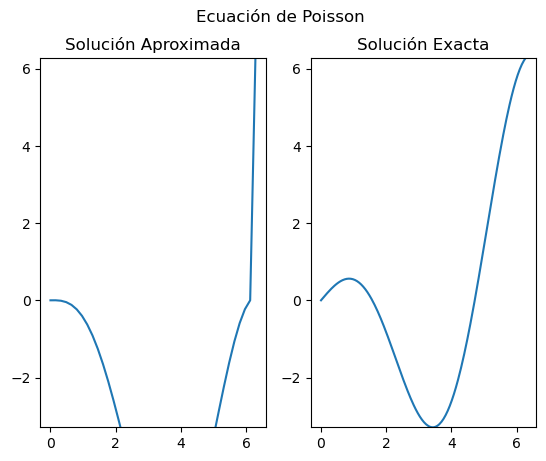

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)                                            # Se hace una figura con dos figuras incrustadas.
plt.rcParams["figure.figsize"] = (10,5)                                         # Se define el tamaño de la figura principal.
plt.suptitle('Ecuación de Poisson')                                             # Se pone un título a la figura principal.
minu  = phi_ex.min()                                                             # Se encuentra el valor mínimo de la solución para ajustar la gráfica.
maxu  = phi_ex.max()                                                             # Se encuentra el valor máximo de la solución para ajustar la gráfica.

ax1.set_title('Solución Aproximada')                                            # Se pone el título de la primera figura incrustada.
ax1.plot(x, phi_ap)                                                             # Se grafica la solución aproximada en la primera figura incrustada.
ax1.set_ylim([minu,maxu])                                                         # Se establecen los ejes de la gráfica.

ax2.set_title('Solución Exacta')                                                # Se pone el título de la segunda figura incrustada.
ax2.plot(x2, phi_ex)                                                            # Se grafica la solución exacta en la segunda figura incrustada.
ax2.set_ylim([minu,maxu])                                                         # Se establecen los ejes de la gráfica.
plt.show()                                                                      # Se muestra la figura.